# Data exploration

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
joint_data = pd.read_csv('joint_data.csv') # note to correct spelling of 'joint' at some point

In [3]:
pd.set_option("display.max_rows", 100, "display.max_columns", None)

joint_data

,Unnamed: 0,route_id,route_linestring,num_of_waypoint,poi_lat_lgt,poi_category,poi_name,distance
0,0,113043.0,"LINESTRING (52.45147 13.69072, 52.45147 13.690...",133.0,POINT (52.4385208 13.6774745),['viewpoint'],Müggeleck,0.000138
1,1,113043.0,"LINESTRING (52.45147 13.69072, 52.45147 13.690...",282.0,POINT (52.444312 13.6279051),['bench'],NaN,0.000551
2,2,113043.0,"LINESTRING (52.45147 13.69072, 52.45147 13.690...",288.0,POINT (52.4444457 13.6271595),['bench'],NaN,0.000122
3,3,113043.0,"LINESTRING (52.45147 13.69072, 52.45147 13.690...",288.0,POINT (52.4444808 13.6269487),['bench'],NaN,0.000110
4,4,113043.0,"LINESTRING (52.45147 13.69072, 52.45147 13.690...",292.0,POINT (52.4453161 13.6273851),['bench'],NaN,0.000319
...,...,...,...,...,...,...,...,...
91099,91099,3674009.0,"LINESTRING (52.53883 13.21284, 52.53883 13.212...",388.0,POINT (52.5895611 13.2834619),['tree'],NaN,0.000263
91100,91100,3674009.0,"LINESTRING (52.53883 13.21284, 52.53883 13.212...",388.0,POINT (52.5890324 13.2843859),['tree'],NaN,0.000801
91101,91101,3674009.0,"LINESTRING (52.53883 13.21284, 52.53883 13.212...",388.0,POINT (52.5889504 13.2844894),['tree'],NaN,0.000932
91102,91102,3674128.0,"LINESTRING (52.4888 13.26176, 52.48877 13.2618...",281.0,POINT (52.451652 13.191308),['tree'],NaN,0.000239


Creating a subset which gives the number of POIs per route

In [32]:
joint_data.groupby( ["route_id"] ).size().to_frame(name = 'poi_count').reset_index()

,route_id,poi_count
0,113043.0,53
1,113104.0,61
2,113232.0,5
3,128939.0,3
4,148436.0,244
5,186976.0,62
6,198322.0,204
7,198338.0,351
8,246822.0,248
9,303905.0,6


Creating an overview of the spread of categories

In [45]:
category_counts = joint_data.groupby( ["poi_category"] ).size().to_frame(name = 'category_count').reset_index()
category_counts = category_counts.sort_values(by='category_count', ascending = False)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

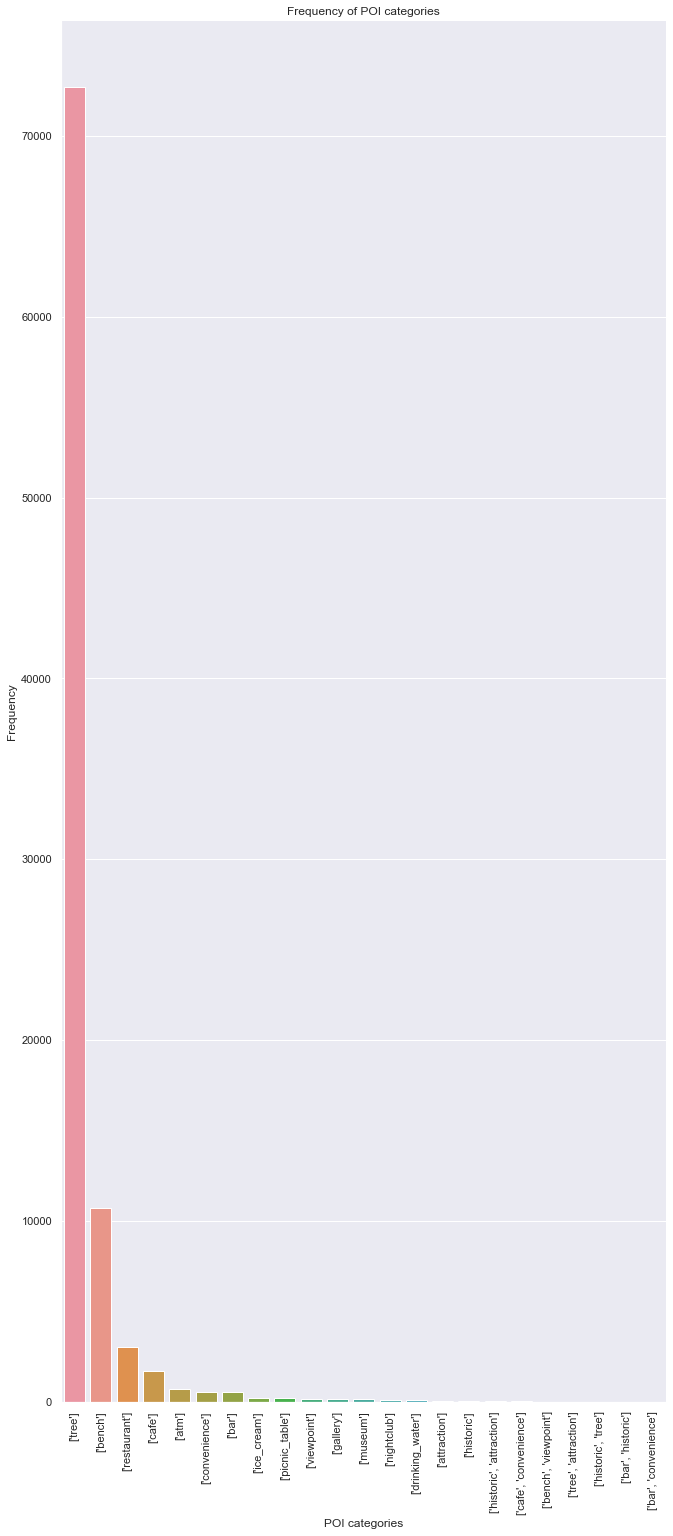

In [82]:
plt.figure()
ax = sns.catplot(data=category_counts, x="poi_category", y="category_count", kind="bar", height=20, aspect=0.5)
locs, labels = plt.xticks()
ax.set(title = "Frequency of POI categories",
       xlabel = "POI categories",
       ylabel = "Frequency")
plt.setp(labels, rotation=90)

plt.show

In [4]:
route_grp = joint_data.groupby(['route_id'])
len(route_grp)

430

In [22]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
route_grp['poi_category'].value_counts().iloc[0]

29

In [ ]:
route_grp["poi_category"].value_counts().T.plot(kind='bar', stacked=True)

#sns.barplot(x="day", y="total_bill", data=route_grp)

#sns.displot(x = route_id.index, hue = route_grp.poi_category, multiple="stack")

In [13]:
df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])

MultiIndex([( 113043.0,        '['tree']'),
            ( 113043.0,  '['restaurant']'),
            ( 113043.0,        '['cafe']'),
            ( 113043.0,       '['bench']'),
            ( 113043.0,         '['atm']'),
            ( 113043.0,         '['bar']'),
            ( 113043.0,   '['ice_cream']'),
            ( 113043.0,   '['viewpoint']'),
            ( 113104.0,        '['tree']'),
            ( 113104.0,       '['bench']'),
            ...
            (3672508.0,        '['cafe']'),
            (3672508.0, '['convenience']'),
            (3673084.0,       '['bench']'),
            (3673084.0,  '['restaurant']'),
            (3674009.0,        '['tree']'),
            (3674009.0,       '['bench']'),
            (3674009.0,        '['cafe']'),
            (3674009.0,   '['viewpoint']'),
            (3674128.0,        '['tree']'),
            (3675718.0,        '['tree']')],
           names=['route_id', 'poi_category'], length=2394)

### Ideas

- plot the number of POIs against number of waypoints, for the whole dataset, and see if there is a correlation there, and whether we have some interesting outliers (super 'interesting' or super 'boring' routes)

- display distribution of categories
    - across how many routes is each category spread?
- What is the average number of trees per route?
    - Does every route have trees?
    - What is the cut off for a green route?